IFI8420 (Business Machine Learning) 
Homework 3 (Group)

Student's name: Eferhire Aganbi

#Import required packages

In [78]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import seaborn as sns

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

# State Business question:

Imagine that we are a firm of data scientists/analysts employed by a company that owns a chain of supermarket stores across states in the US. Our consulting firm has been hired to conduct a survey on consumers' perception of cereals brands stocked by the supermarket; the goal is to identify what informs customers' decision for picking a particular brand as a healthier option.  We have been asked to examine which nutrients consumers considered more important when selecting a healthy cereal brand. If successful, our analysis will help the company decide on key improvements on popular cereal brands. 

In [79]:
# upload data as csv.file 

cereal_df = pd.read_csv('Cereals.csv')

In [3]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [4]:
cereal_df.shape

(77, 16)

In [5]:
# introduce dataset

cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [6]:
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [80]:
#Variety of cereals produced by brand
cereal_df['mfr'].value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

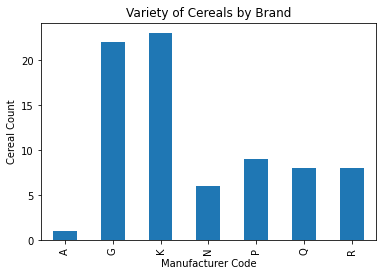

In [107]:
#Visualize the variety of cereals by brand
df=cereal_df[['mfr','calories']]
ax = df.groupby('mfr').count().plot(kind='bar', title='Variety of Cereals by Brand', legend=False, 
                                    xlabel='Manufacturer Code', ylabel='Cereal Count')


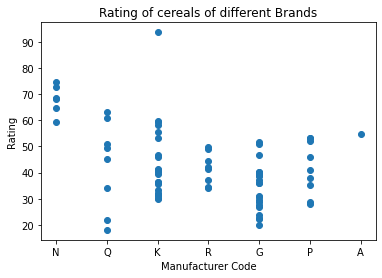

In [160]:
#Visualize rating of cereals of different brands
plt.scatter(cereal_df['mfr'], cereal_df['rating'])
plt.title('Rating of cereals of different Brands')
plt.xlabel("Manufacturer Code")
plt.ylabel("Rating")
plt.show()

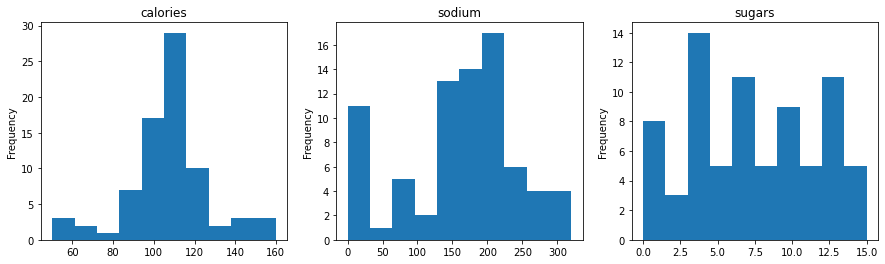

In [145]:
#Histogram of calories, sodium, and sugars in cereals
df1 = cereal_df[['calories','sodium', 'sugars']] 
fig, axes = plt.subplots(ncols=len(df1.columns), figsize=(15,4))
for col, ax in zip(df1, axes):
    df1[col].sort_index().plot.hist(ax=ax, title=col)
plt.show()

<AxesSubplot:>

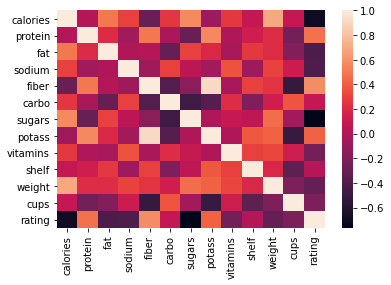

In [12]:
corr = cereal_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

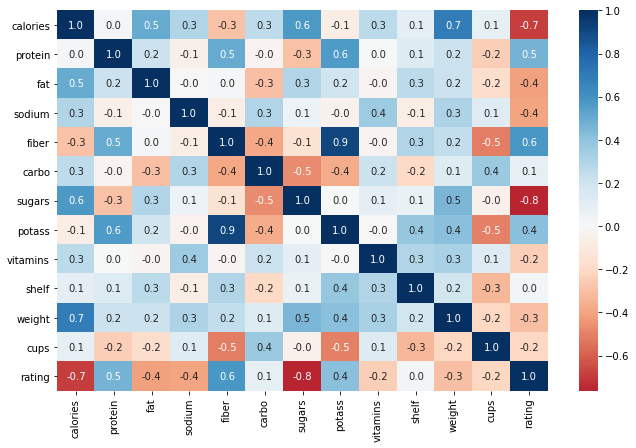

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

In [16]:
# data pre-processing
cereal_df = cereal_df.rename(columns={'type': 'type_cereal'})
cereal_df.columns

Index(['name', 'mfr', 'type_cereal', 'calories', 'protein', 'fat', 'sodium',
       'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight',
       'cups', 'rating'],
      dtype='object')

In [17]:
cereal_df['type_cereal'].value_counts()

C    74
H     3
Name: type_cereal, dtype: int64

In [18]:
# remove rows with missing values 
reduced_df = cereal_df.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_df))

Number of rows after removing rows with missing values:  74


In [19]:
#Run linear Regression

predictors = ['type_cereal','calories','protein','fat','sodium','fiber','carbo', 
              'sugars','potass', 'vitamins', 'shelf','weight','cups']
outcome = 'rating'

# partition data
X = pd.get_dummies(cereal_df[predictors], drop_first=True)
y = cereal_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

cereal_lm = LinearRegression()
cereal_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', cereal_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': cereal_lm.coef_}))

# print performance measures
regressionSummary(train_y, cereal_lm.predict(train_X))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').